In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from summarytools import dfSummary
import pickle
from dash import Dash, html, dcc
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash.dependencies import Input, Output
import plotly.io as pio


###################### Styling Parameter ###############
background_color = "white"
html_elements_color = "#001124"
global_border_radius = "5px"
gdp_color = "#0057c4"
energy_color = "#b50000"
prod_color = "#008200"
pio.templates["custom_template"] = pio.templates["plotly_dark"]
pio.templates["custom_template"].layout.update({
'paper_bgcolor': html_elements_color,
'plot_bgcolor': html_elements_color,
})

Layout({
    'annotationdefaults': {'arrowcolor': '#f2f5fa', 'arrowhead': 0, 'arrowwidth': 1},
    'autotypenumbers': 'strict',
    'coloraxis': {'colorbar': {'outlinewidth': 0, 'ticks': ''}},
    'colorscale': {'diverging': [[0, '#8e0152'], [0.1, '#c51b7d'], [0.2,
                                 '#de77ae'], [0.3, '#f1b6da'], [0.4, '#fde0ef'],
                                 [0.5, '#f7f7f7'], [0.6, '#e6f5d0'], [0.7,
                                 '#b8e186'], [0.8, '#7fbc41'], [0.9, '#4d9221'],
                                 [1, '#276419']],
                   'sequential': [[0.0, '#0d0887'], [0.1111111111111111,
                                  '#46039f'], [0.2222222222222222, '#7201a8'],
                                  [0.3333333333333333, '#9c179e'],
                                  [0.4444444444444444, '#bd3786'],
                                  [0.5555555555555556, '#d8576b'],
                                  [0.6666666666666666, '#ed7953'],
                           

# 0. Einleitung

## 0.1 Zweck der Datenvorbereitung
Im Rahmen des Abschlussprojekts zum Kurs "Data Analytics" wollen wir eine ausführliche explorative Datenanalyse (EDA) der Daten zu Energieverbräuchen und Bruttoinlandsprodukt europäischer Länder auf Quartals- und Jahresbasis vornehmen. 

Dafür bedienen wir uns der Daten aus der zentralen europäischen Datenplattform eurostat. Diese werden im Rahmen dieses Jupyter-Notebooks geladen, verarbeitet, und deskriptiv analysiert. 

Am Ende dieses Notebooks werden wir die Kerndaten vorliegen haben, die wir für unsere EDA benötigen. Diese werden wir in einem anderen Jupyter-Notebook vornehmen.

## 0.2 Ziel der Datenaufbereitung
Für unser Projekt wollen wir eine Analyse zweier ökonomischer Kerngrößen der europäischen Länder vornehmen. Konkret wollen wir die quartalsweisen und jährlichen Daten zum Energieverbrauch und dem erzeugten Bruttoinlandsprodukt (BIP) einzelner europäischer Länder betrachten und analysieren. 

Hierfür benötigen wir die quartalsweisen und jährlichen Daten dieser beiden Größen. Wir werden die Daten zunächst Laden, auf lückenhafte Anteile untersuchen, und uns auf einen vollständigen Teildatensatz beschränken. Dabei werden wir, dort wo möglich, fehlende Daten auffüllen. Anschließend werden wir die Daten in einen gemeinsamen Datensatz überführen, die nötigen Aggregationen vornehmen, und die Daten grob beschreiben.

## 0.3 Quelldatensätze
Für das Projekt beziehen wir unsere Daten von der Website eurostat.com (https://ec.europa.eu/eurostat/en/). Wir beziehen zwei separate Datensätze, da die Daten für den Energieverbrauch und das Bruttoinlandsprodukt auf eurostat.com getrennt vorliegen. Wir verwenden die Datensätze, die auf folgenden Unterseiten von eurostat.com heruntergeladen werden können:
- Monatliche Werte des Energieverbrauchs:
    - https://ec.europa.eu/eurostat/databrowser/view/nrg_cb_em__custom_13810956/default/table?lang=en
- Quartalsweise Werte des Bruttoinlandsprodukgt (engl.: GDP = Gross Domestic Product):
    - https://ec.europa.eu/eurostat/databrowser/view/namq_10_gdp__custom_13810930/default/table?lang=en

# 1. Laden und Datenaufbereitung: Energieverbrauch europäischer Länder

## 1.1 Laden und Einschränken der Daten
Wir beginnen mit dem Laden der Daten für den Energieverbrauch und der Einschränkung auf einen vollständigen Teildatensatz. Hierfür importieren wir zunächst die Daten aus einer Exceldatei, die wir von https://ec.europa.eu/eurostat/databrowser/view/nrg_cb_em__custom_13810956/default/table?lang=en heruntergeladen haben.
Wir lassen uns im Anschluss eine kurze Information zur Zeilen- und Spaltenstruktur anzeigen.

In [3]:
# Importiere Daten aus Excel
df_energy_months = pd.read_excel(r"ENERGY.xlsx", sheet_name= "Data", header=9)
df_energy_months.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 403 entries, TIME to Unnamed: 402
dtypes: float64(141), object(262)
memory usage: 151.3+ KB


Wir sehen, dass unser Dataframe 48 Zeilen und 402 Spalten hat. Da wir auf Eurostat eine Datei heruntergeladen haben, die Länderzeilen und zeitliche Spalten hat, gehen wir davon aus, dass die 48 Zeilen die Länder beinhalten, und die 402 Spalten zeitliche Abschnitte. Wir lassen uns zum Überblick den Tabellenkopf mit den ersten Zeilen anzeigen.

In [4]:
df_energy_months.head(5)

,TIME,2008-01,Unnamed: 2,2008-02,Unnamed: 4,2008-03,Unnamed: 6,2008-04,Unnamed: 8,2008-05,...,2024-05,Unnamed: 394,2024-06,Unnamed: 396,2024-07,Unnamed: 398,2024-08,Unnamed: 400,2024-09,Unnamed: 402
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),:,NaN,:,NaN,:,NaN,:,NaN,:,...,186676.831,NaN,186041.513,NaN,201974.983,NaN,194393.749,NaN,:,NaN
2,Belgium,8400,NaN,7932,NaN,8047,NaN,7547,NaN,7222,...,5928.031,NaN,5827.389,NaN,5743.139,NaN,5952.056,NaN,:,NaN
3,Bulgaria,3808,NaN,3281,NaN,2923,NaN,2593,NaN,2449,...,2282.772,NaN,2343.203,NaN,2592.918,NaN,2477.38,NaN,:,NaN
4,Czechia,6352,NaN,5878,NaN,6019,NaN,5492,NaN,5111,...,4445.489,NaN,4296.932,NaN,4309.488,NaN,4348.793,NaN,:,NaN


Wir sehen:
- In der Spalte "Time" stehen die Länder, und einige zusätzliche Zeilen, die wir eventuell nicht benötigen.
- Die Spalten scheinen Wertespalten mit der Überschriftsnomenklatur "JJJJ-MM" zu sein, enthalten jedoch etliche Leerspalten ("Unnamed"). 

Zum besseren Überblick betrachten wir zunächst die eindeutigen Einträge in der "TIME"-Spalte (die wir gleich umbenennen werden) genauer, und sortieren aus.

In [5]:
df_energy_months.TIME.unique()

array(['GEO (Labels)', 'European Union - 27 countries (from 2020)',
       'Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Norway',
       'United Kingdom', 'Bosnia and Herzegovina', 'Montenegro',
       'Moldova', 'North Macedonia', 'Georgia', 'Albania', 'Serbia',
       'Türkiye', 'Ukraine', 'Kosovo*', nan, 'Special value', ':',
       'Available flags:', 'e', 'p'], dtype=object)

Wir sehen, dass die Länder ab Zeile 3 ("Belgium") beginnen und bei "Kosovo*" aufhören. Die anderen Zeilen benötigen wir nicht, und verwerfen sie sofort.
Außerdem entfernen wir direkt das Zeichen "*" bei Kosovo und benennen die Spalte um

In [6]:
# Entferne Zeile "GEO (Labels)" und "European Union - 27 Countries..." und unnötige zeilen ab index 42
df_energy_months = df_energy_months.drop(index=[0,1]+list(range(42,48))).reset_index(drop=True)
# Benenne Spalte "Time" in "Land" um
df_energy_months = df_energy_months.rename(columns={'TIME': 'Land'})
# Konvertiere Country zu string, entferne Stern bei Kosovo
df_energy_months["Land"]=df_energy_months["Land"].astype(str)
df_energy_months['Land'] = df_energy_months['Land'].replace('Kosovo*', 'Kosovo')

Bevor wir auf unser Zwischenergebnis blicken, machen wir mir den Spalten weiter. 

Wir untersuchen zunächst, ob in den "Unnamed"-Spalten Inhalte sind, die wir benötigen, indem wir auf NaN-Einträge prüfen und summieren.
Wir lassen uns außerdem die Größe des Dataframes anzeigen, um die ANzahl der Zeilen nochmals zu erhalten.

In [6]:
# Filtere Spalten, die 'Unnamed' im Namen enthalten
unnamed_columns = [col for col in df_energy_months.columns if 'Unnamed' in col]
# Berechne die Anzahl der Nullwerte in diesen Spalten
null_counts = df_energy_months[unnamed_columns].isnull().sum()
print(null_counts)
print("\nZeilen- und Spaltenzahl Dataframe: ", df_energy_months.shape)

Unnamed: 2      40
Unnamed: 4      40
Unnamed: 6      40
Unnamed: 8      40
Unnamed: 10     40
                ..
Unnamed: 394    39
Unnamed: 396    39
Unnamed: 398    39
Unnamed: 400    38
Unnamed: 402    39
Length: 201, dtype: int64

Zeilen- und Spaltenzahl Dataframe:  (40, 403)


Wir sehen, dass die Spalten (bei aktuell 48 Zeilen des Dataframes) weitestgehend leer sind. Wir verwerfen sie komplett.

In [7]:
# Entferne leere (namenlose) Spalten
df_energy_months = df_energy_months.loc[:, ~df_energy_months.columns.str.contains('Unnamed')]

Wir betrachten nun unser Zwischenergebnis:

In [8]:
df_energy_months

,Land,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09
0,Belgium,8400,7932,8047,7547,7222,7029,6895,6833,7142,...,6513.792,7130.839,6486.504,6339.905,6036.487,5928.031,5827.389,5743.139,5952.056,:
1,Bulgaria,3808,3281,2923,2593,2449,2393,2540,2560,2480,...,3104.017,3407.924,2751.532,2770.472,2251.339,2282.772,2343.203,2592.918,2477.38,:
2,Czechia,6352,5878,6019,5492,5111,4784,4821,4757,5080,...,5266.225,5892.172,5044.031,5047.03,4590.219,4445.489,4296.932,4309.488,4348.793,:
3,Denmark,3430,3149,3190,2932,2830,2752,2654,2820,2848,...,3355.682,3502.032,3051.732,3023.324,2859.523,2604.488,2521.748,2401.916,2594.803,2606.315
4,Germany,44608,43957,42685,44500,41890,41216,42058,40603,41910,...,36524.621,39635.236,36537.836,37157.532,35767.86,34727.333,34843.028,36110.135,35380.906,:
5,Estonia,864,775,816,704,637,569,561,616,689,...,835.4,918.3,787.418,741.451,689.062,626.359,551.815,556.139,575.3,:
6,Ireland,2656,2474,2529,2364,2230,2098,2182,2165,2197,...,2783.888,2918.438,2636.449,2783.694,2550.54,2489.453,2309.435,2442.282,2466.425,2469.147
7,Greece,4751,4253,3873,4038,4309,4912,5752,5265,4526,...,4168.203,4496.141,3933.097,3686.998,3335.89,3520.845,4807.653,5726.6,5018.885,3895.889
8,Spain,24597,23096,21690,21310,21517,21021,23305,22273,21567,...,19095.838,20026.227,18253.6,18583.065,17344.877,17537.713,17628.45,20463.259,20167.518,17856.105
9,France,49891,45277,46605,41417,35384,34787,35850,32868,35637,...,40898.49,44502.755,36746.014,36682.078,32322.31,29686.248,28663.141,31027.971,29008.817,29075.908


Wir haben nun eine Tabelle vorliegen, die in den Zeilen die Länder enthält, und in den Spalten (mit der Überschriftsnomenklatur "JJJJ-MM") die monatlichen Werte. 

Etliche Spalteneinträge sind ein Doppelpunkt (":"), der fehlende Werte anzeigt. Diese entfernen wir zunächst und nehmen Formatierung an Index und Spaötenlabels vor.

In [9]:
# Ersetze Doppelpunkte durch 0 und ändere Spaltentyp auf in (wirf Dezimalen weg). Führe set_option aus, um zukünftige Änderungen zu übernehmen (sonst future warning)
df_energy_months = df_energy_months.replace(':', np.nan)
pd.set_option('future.no_silent_downcasting', True)
# Country als Index setzen; für Plots während der Datenvervollständigung/-bereinigung hilfreich
df_energy_months.set_index('Land', inplace=True)
# Spaltenlabels in datetime-string konvertieren
df_energy_months.columns = pd.to_datetime(df_energy_months.columns, format='%Y-%m').strftime('%Y-%m')


C:\Users\pprie\AppData\Local\Temp\ipykernel_16372\1575219449.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_energy_months = df_energy_months.replace(':', np.nan)


Nun wollen wir dünn besetzte Bereiche der Tabelle finden und entfernen. Hierfür definieren wir uns zunächst folgende Funktion:

In [10]:
def overview_nulls(dataframe: pd.DataFrame, axis_input: int = 1):
    if axis_input in [0,1]: 
        occ_of_nulls = dataframe.isnull().sum(axis = axis_input)
        share_nulls = np.floor((dataframe.isnull().sum(axis = axis_input) / dataframe.shape[axis_input]*100)*10) / 10
        overview = pd.DataFrame({"Occurences of NaN": occ_of_nulls, "share (%)": share_nulls})
        result = overview.loc[overview["Occurences of NaN"]>0]
        return result
    else:
        raise ValueError("In function overview_nulls: Only integers 0 or 1 for axis allowed!") 

Wir suchen mithilfe der Funktion zunächst die Zeilen, die mehr als 40 fehlende Einträge haben (Zeilen mit ggf. weniger als 40 fehlenden Einträgen werden wir auffüllen).

In [11]:
overview = overview_nulls(df_energy_months , axis_input= 1)
countries_to_drop = overview[overview["Occurences of NaN"] > 40]
countries_to_drop

,Occurences of NaN,share (%)
Land,,
Iceland,77,38.3
United Kingdom,47,23.3
Bosnia and Herzegovina,120,59.7
Montenegro,61,30.3
Moldova,146,72.6
North Macedonia,61,30.3
Georgia,121,60.1
Albania,120,59.7
Serbia,85,42.2


Wir verwerfen diese Länder (Zeilen) direkt, und arbeiten mit den verbleibenden Zeilen weiter:

In [12]:
df_energy_months = df_energy_months.drop(index=countries_to_drop.index)

Damit haben wir nun noch folgende unvollständige Datenzeilen:

In [13]:
overview_nulls(dataframe=df_energy_months, axis_input=1)

,Occurences of NaN,share (%)
Land,,
Belgium,1,0.4
Bulgaria,1,0.4
Czechia,1,0.4
Germany,1,0.4
Estonia,1,0.4
Croatia,36,17.9
Italy,1,0.4
Cyprus,1,0.4
Lithuania,1,0.4


Wir haben also unseren Datensatz deutlich eingegrenzt.
Wir sehen, dass nur noch 3 Zeilen Kroatien, Malta und die Türkei in höherem Maße unvollständig sind (hierum kümmern wir uns später).
Für den Rest der Länder (Zeilen) fehlt nur noch ein Wert. Das deutet eventuell daraufhin, dass eine einzige Spalte dünn besetzt ist.
Wir überprüfen dies, indem wir unsere Funktion nun für die Spaltenanalyse aufrufen, und grenzen die Rückgabe auf Spalten ein, bei denen mehr als 3 Werte fehlen:

In [14]:
overview = overview_nulls(df_energy_months, axis_input=0)
sparse_columns = overview.loc[overview["Occurences of NaN"]>3]
sparse_columns

,Occurences of NaN,share (%)
2024-09,18,62.0


Wir sehen (wie vermutet), dass noch eine einzige Spalte ("2024-09") dünn besetzt ist (also einen hohen NaN-Anteil hat). Das liegt vermutlich daran, dass der Bereitsteller der Daten (eurostat.com) seine Daten mit einem gewissen Verzug einpflegt.
Wir verwerfen das Jahr 2024, da der vorhergehende Zeitraum für unser Projekt genügt (und wir für spätere Zwecke vollständige Jahresscheiben haben möchten).

In [15]:
# Spalten des Jahres 2024 löschen
cols_to_drop = df_energy_months. filter(regex="^2024-(0[1-9])$").columns
df_energy_months = df_energy_months.drop(columns=cols_to_drop)

Es liegen nun noch (die oben ermittelten) drei Zeilen für Kroatien, Malta und die Türkei vor, die unvollständig sind. Wir werden diese im Folgenden mithilfe einer simplen "Pseudo-Interpolation" füllen.

In [16]:
overview_nulls(df_energy_months)

,Occurences of NaN,share (%)
Land,,
Croatia,36,18.7
Malta,12,6.2
Türkiye,36,18.7


## 1.2 Auffüllen fehlender Daten für Kroatien, Malta, Türkei

Zunächst wollen wir die Wertelücken der unvollständigen Länder Kroatien, Malta und Türkei identifizieren. 

Wir plotten uns hierfür die drei Länder Kroatien, Malta, Türkei, für die wir die fehlenden Daten mit einer simplen Methode auffüllen wollen. Dafür definieren wir folgende Plotting-Funktion, wenden sie auf die Länder an, und geben uns unter dem Plot jeweils die Indizes der fehlenden Werte je Land aus.

In [17]:
def plot_country(series: pd.Series):
    # Sicherstellen, dass der Index ein DatetimeIndex ist
    series.index = pd.to_datetime(series.index)

    # Plot erstellen
    ax = series.plot(figsize=(18, 1.5))  # Serie plotten
    
    # Setze die xticks für jeden Januar (XXXX-01)
    first_year = series.index.year.min()
    last_year = series.index.year.max()
    
    # Erstelle eine Liste der xticks mit Januar jedes Jahres
    jan_ticks = pd.date_range(start=f"{first_year}-01-01", end=f"{last_year}-01-01", freq='YS-JAN')
    
    ax.set_xticks(jan_ticks)
    ax.set_xticklabels(jan_ticks.strftime('%Y-%m'))  # Format für 'YYYY-MM'
    
    # Titel und Achsenbeschriftungen hinzufügen
    plt.title('Liniendiagramm der monatlichen Werte')
    plt.xlabel('Zeit')
    plt.ylabel('Werte [GWh]')

    # Diagramm anzeigen
    plt.legend(title='Land')
    plt.grid(True)
    plt.show()

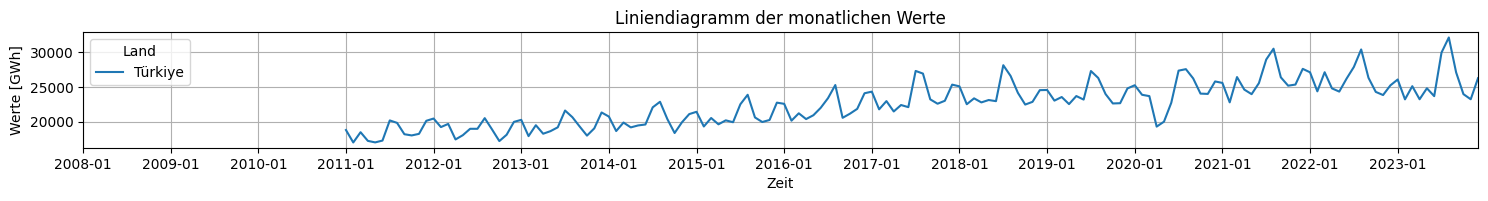

Fehlende Werte für die Türkei:
 Index(['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
       '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
       '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
       '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12'],
      dtype='object')


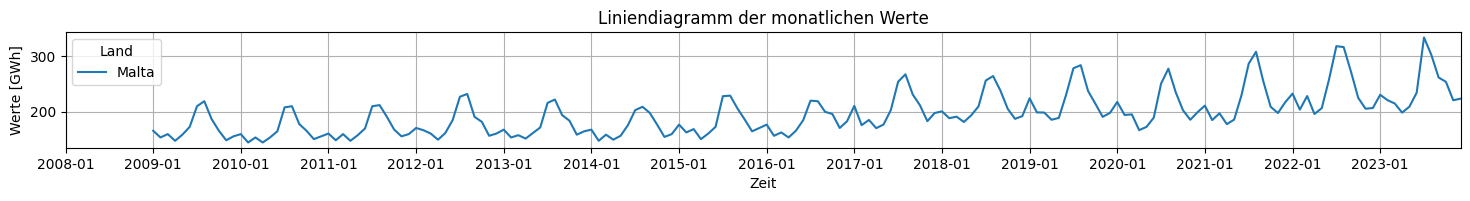

Fehlende Werte für Malta:
 Index(['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12'],
      dtype='object')


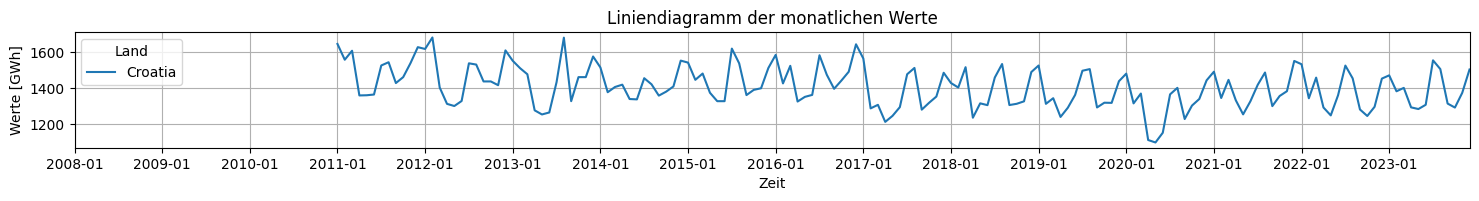

Fehlende Werte für Kroatien:
 Index(['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
       '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
       '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
       '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12'],
      dtype='object')


In [18]:
plot_country(df_energy_months.loc["Türkiye"])
print("Fehlende Werte für die Türkei:\n", df_energy_months.loc["Türkiye"][df_energy_months.loc["Türkiye"].isnull()].index)

plot_country(df_energy_months.loc["Malta"])
print("Fehlende Werte für Malta:\n", df_energy_months.loc["Malta"][df_energy_months.loc["Malta"].isnull()].index)

plot_country(df_energy_months.loc["Croatia"])
print("Fehlende Werte für Kroatien:\n", df_energy_months.loc["Croatia"][df_energy_months.loc["Croatia"].isnull()].index)

Wir können in obigen Plots und der Ausgabe der Indizes der fehlenden Werte direkt die Lücken ablesen. 

Wir füllen die Lücken einfach auf, indem wir für ein fehlendes Jahr (t) das nächste vorhandene Jahr nehmen (t+1), und davon für jeden Monat ein Zwölftel des durchschnittlichen Jahreszuwachses abziehen (eine Art manuelle, simple lineare Interpolation). Dazu definieren wir uns zunächst folgende Funktion:

In [19]:
def fill_missing_year(data, country, missing_year, last_referencing_year):
    # Serie für das Land extrahieren und DatetimeIndex sicherstellen
    country_series = data.loc[country]
    country_series.index = pd.to_datetime(country_series.index)

    # erstes Referenzjahr für Berechnung des durchschn. Anstiegs pro Monat:
    first_referencing_year = missing_year + 1

    # Berechnung der Steigung
    first_available_value = country_series.loc[str(first_referencing_year)].mean()
    last_available_value = country_series.loc[str(last_referencing_year)].mean()
    num_years = last_referencing_year - first_referencing_year
    abs_total_rise_per_year = (last_available_value - first_available_value) / num_years
    abs_monthly_rise_per_year = abs_total_rise_per_year / 12

    # Fehlendes Jahr auffüllen
    country_series[str(missing_year)] = country_series[str(first_referencing_year)] - abs_monthly_rise_per_year

    # Ergebnis zurückgeben
    return country_series

Nun wenden wir die Funktion für die Türkei, Kroatien und Malta an, und erhalten für die aufzufüllenden Jahre eine für unsere Zwecke angemessene Fortsetzung für die fehlenden Jahre.

C:\Users\pprie\AppData\Local\Temp\ipykernel_16372\3249269716.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_series[str(missing_year)] = country_series[str(first_referencing_year)] - abs_monthly_rise_per_year


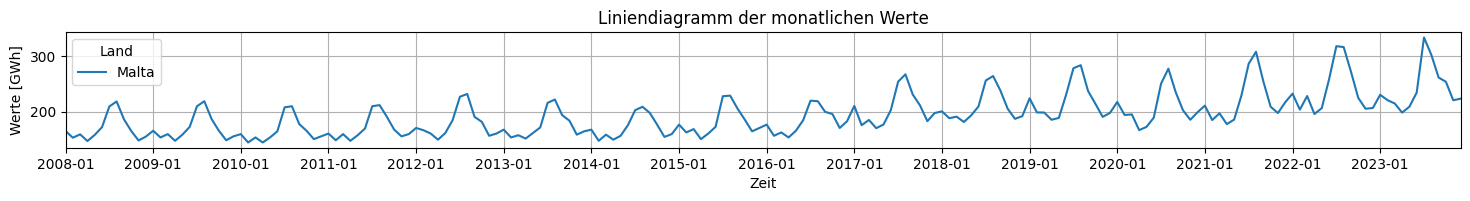

C:\Users\pprie\AppData\Local\Temp\ipykernel_16372\3249269716.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_series[str(missing_year)] = country_series[str(first_referencing_year)] - abs_monthly_rise_per_year
C:\Users\pprie\AppData\Local\Temp\ipykernel_16372\3249269716.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_series[str(missing_year)] = country_series[str(first_referencing_year)] - abs_monthly_rise_per_year
C:\Users\pprie\AppData\Local\Temp\ipykernel_16372\3249269716.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

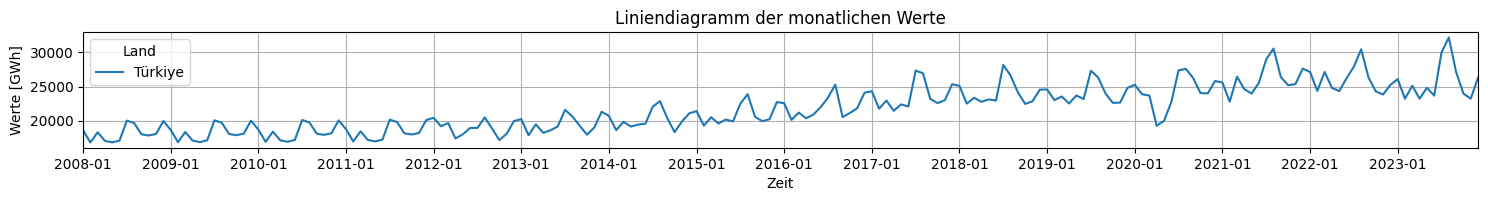

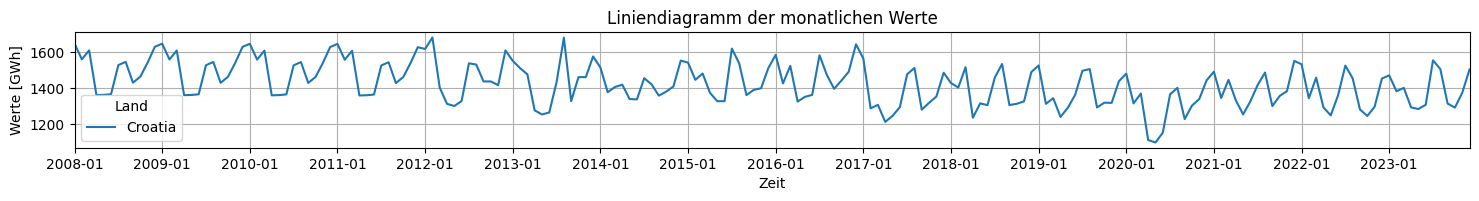

In [20]:
df_energy_months.loc["Malta"] = fill_missing_year(df_energy_months, "Malta", missing_year=2008, last_referencing_year=2022)
plot_country(df_energy_months.loc["Malta"])

for year in [2010, 2009, 2008]:
    df_energy_months.loc["Türkiye"] = fill_missing_year(df_energy_months, "Türkiye", missing_year=year, last_referencing_year=2023)
    df_energy_months.loc["Croatia"] = fill_missing_year(df_energy_months, "Croatia", missing_year=year, last_referencing_year=2023)
plot_country(df_energy_months.loc["Türkiye"])
plot_country(df_energy_months.loc["Croatia"])

Wir betrachten final nun nochmals unseren Dataframe in Bezug auf Lücken (und sehen, dass keine mehr vorliegen):

In [21]:
overview_nulls(df_energy_months)

,Occurences of NaN,share (%)
Land,,


Zu guter Letzt setzen wir den Typ der Spalten auf Integer.

In [22]:
# df_energy_months = df_energy_months.astype(int)

# 2. Laden und Datenaufbereitung: Bruttoinlandsprodukt (BIP) europäischer Länder

## 2.1 Laden und Einschränken der Daten
Wir fahren fort mit dem Laden und Aufbereiten der Daten für das Bruttoinlandsprodukt (BIP bzw. englisch: GDP), sowie der Einschränkung auf einen vollständigen Teildatensatz. Wir importieren die Daten aus einer Exceldatei, die wir von https://ec.europa.eu/eurostat/databrowser/view/namq_10_gdp__custom_13810930/default/table?lang=en heruntergeladen haben.

Da die Datei nahezu exakt dieselbe Struktur hat, ersparen wir dem Leser die ausführliche Herleitung und Erklärung der Folgeschritte, da diese grundsätzlich dieselben sind wie bei den Energiedaten: 
- Wir finden unnötige Zeilen und Spalten vor, entfernen diese, benennen um, etc.. 
- Wir reduzieren auf einen vollständigen Teilbereich der Daten. Hier haben wir es einfacher:
    - Die importierten Daten sind im Zeitraum 2008 bis 2023 (bis auf die Zeilen, die wir ohnehin verwerfen) vollständig. Das ist genau der Zeitraum, für den wir oben unsere Energiedaten erarbeitet haben. Wir verwerfen beim BIP also den kompletten Rest.

Hinweis: Die importierten Daten haben hier bereits Quartalswerte, keine Monatswerte.

In [23]:
# Importiere Daten aus Excel
df_gdp_quarters = pd.read_excel(r"GDP.xlsx", sheet_name= "Data", header=9)
# Benenne Spalte "Time" in "Land" um
df_gdp_quarters = df_gdp_quarters.rename(columns={'TIME': 'Land'})
# Konvertiere Country zu string
df_gdp_quarters["Land"]=df_gdp_quarters["Land"].astype(str)
# Entferne leere (namenlose) Spalten
df_gdp_quarters = df_gdp_quarters.loc[:, ~df_gdp_quarters.columns.str.contains('Unnamed')]
# Ersetze Doppelpunkte durch 0 und ändere Spaltentyp auf in (wirf Dezimalen weg). Führe set_option aus, um zukünftige Änderungen zu übernehmen (sonst future warning)
df_gdp_quarters = df_gdp_quarters.replace(':', np.nan)
pd.set_option('future.no_silent_downcasting', True)
# Country als Index setzen
df_gdp_quarters.set_index('Land', inplace=True)
# Zeitraum vor 2008 verwerfen
df_gdp_quarters = df_gdp_quarters.loc[:,"2008-Q1":"2023-Q4"]
# nur Länder betrachten, die in Energie-Zeitreihe vorhanden sind
df_gdp_quarters = df_gdp_quarters.loc[df_gdp_quarters.index.isin(df_energy_months.index)]
# Typ int setzen
df_gdp_quarters = df_gdp_quarters.astype(int)


Wir werfen einen kurzen Blick auf die ersten Zeilen der aufbereiteten Daten, und vergewissern uns direkt darunter, dass alle Zeilen komplett vollständig sind:

In [24]:
df_gdp_quarters.head(3)

,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,2010-Q2,...,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4
Land,,,,,,,,,,,,,,,,,,,,,
Belgium,85776,89999,85932,90035,82764,86755,84230,93983,85858,91454,...,122361,139202,131662,141269,137028,153583,144828,150334,143072,158085
Bulgaria,7616,8952,10367,10310,7911,9304,10017,10184,7633,9249,...,19611,20588,17300,19999,23369,25413,20449,22188,24881,27190
Czechia,36710,41167,43371,40718,33872,37061,38748,39733,35923,39933,...,63754,66269,64837,71591,73813,76792,74559,81785,80106,80907


In [25]:
overview_nulls(df_gdp_quarters, axis_input=0)

,Occurences of NaN,share (%)


# 3. Transfer der Datensätze ins long-format und Zusammenführung

## 3.1 Transfer long-Format und Aggregation der Energiedaten
Wir formatieren nun die beiden Dataframes ins long-Format, da dieses für das Plotten und unsere weiteren Analysen extrem nützlich bzw. unumgänglich ist. 

Des Weiteren trennen wir die Zeitspalte des Dataframe (bisher: "JJJJ-MM") auf in zwei getrennte Spalten für Jahr und Quartal. So können wir in der Folge besser auf die Quartalsebene aggregieren.

Schließlich Aggregieren wir bei den Energiedaten die Werte auf die Quartalsebene hoch. Wir nehmen an dieser Stelle bewusst in Kauf, dass statistische Information auf Monatsebene (Durchschnitt, Ausreißerwerte, Abweichungen, etc.) bei den Energiedaten dabei verloren geht, bzw. an Granulartität verliert. Die Information ist dann auf Quartalsebene aber noch in aggregierter Form vorhanden. Die monatliche Zeitebene interessiert uns im Projekt nicht.

In [26]:
# Transfer Energiedaten ins long-Format
df_energy_months.reset_index(inplace=True)
df_energy_months_long = df_energy_months.melt(id_vars = ["Land"], var_name= "Datum", value_name= "Energieverbrauch (GWh)")
# Trennung der Zeitspalte in Jahr und Monat
df_energy_months_long[["Jahr", "Monat"]] = df_energy_months_long["Datum"].str.split("-", expand= True)
df_energy_months_long['Quartal'] = df_energy_months_long['Monat'].astype(int).apply(lambda x: "Q" + str(f"{(x - 1) // 3 + 1}"))
df_energy_months_long = df_energy_months_long.drop(columns = ["Datum"])
df_energy_months_long = df_energy_months_long[["Land", "Jahr", "Quartal", "Monat", "Energieverbrauch (GWh)"]]
# Aggregation auf Quartalsebene
df_energy_long = df_energy_months_long.groupby(["Land", "Jahr", "Quartal"], sort=False, as_index=False, observed=False).agg(
    {"Energieverbrauch (GWh)": "sum"}
)

C:\Users\pprie\AppData\Local\Temp\ipykernel_16372\2074307573.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_energy_months.reset_index(inplace=True)


Wir werfen einen kurzen Blick auf das Ergebnis:

In [27]:
df_energy_long.head(2)

,Land,Jahr,Quartal,Energieverbrauch (GWh)
0,Belgium,2008,Q1,24379.0
1,Bulgaria,2008,Q1,10012.0


Wir nehmen ähnliche Schritte beim BIP vor:

In [28]:
# Transfer BIP-Daten ins long-Format
df_gdp_quarters.reset_index(inplace=True)
df_gdp_long = df_gdp_quarters.melt(id_vars = ["Land"], var_name= "Datum", value_name= "BIP (Mio €)")
df_gdp_long[["Jahr", "Quartal"]] = df_gdp_long["Datum"].str.split("-", expand= True)
df_gdp_long = df_gdp_long[["Land", "Jahr", "Quartal", "BIP (Mio €)"]]

In [29]:
df_gdp_long.head(2)

,Land,Jahr,Quartal,BIP (Mio €)
0,Belgium,2008,Q1,85776
1,Bulgaria,2008,Q1,7616


## 3.2 Zusammenführung der Dataframes (BIP und Energie)
Wir führen nun die Daten zu Energie und BIP zusammen in einen gemeinsamen Dataframe auf Quartalsebene. Damit haben wir alle Daten an einem Ort, von dem aus wir dann auf die Jahresebene aggregieren werden.

In [30]:
df_combined = pd.merge(
    df_energy_long,
    df_gdp_long,
    on=["Land", "Jahr", "Quartal"],
    how="inner"  # nur gemeinsame Einträge werden behalten
)
df_combined.head(3)

,Land,Jahr,Quartal,Energieverbrauch (GWh),BIP (Mio €)
0,Belgium,2008,Q1,24379.0,85776
1,Bulgaria,2008,Q1,10012.0,7616
2,Czechia,2008,Q1,18249.0,36710


Wir nehmen nun noch die Konvertierung der Energieverbrauchswerte vor und werfen einen kurzen finalen Blick auf die Datentypen.

In [31]:
df_combined["Energieverbrauch (GWh)"] = df_combined["Energieverbrauch (GWh)"].astype(int)

In [32]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Land                    1856 non-null   object
 1   Jahr                    1856 non-null   object
 2   Quartal                 1856 non-null   object
 3   Energieverbrauch (GWh)  1856 non-null   int64 
 4   BIP (Mio €)             1856 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 72.6+ KB


# 4. Deskriptive Datenanalyse
## 4.1 Statistische Grundbetrachtung gesamte Datenmenge
Nun betrachten wir kurz die statistischen Grundwerte der Spalten des zusammengeführten Datensatzes.



In [33]:
dfSummary(df_combined)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Land[object],1. Belgium2. Bulgaria3. Czechia4. Denmark5. Germany6. Estonia7. Ireland8. Greece9. Spain10. France11. other,"64 (3.4%)64 (3.4%)64 (3.4%)64 (3.4%)64 (3.4%)64 (3.4%)64 (3.4%)64 (3.4%)64 (3.4%)64 (3.4%)1,216 (65.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADiElEQVR4nO3cQWoaYQCG4d8iodkoIngYD9HD9hDeRsRZNCEbuygFaZKdvBOmz7MqsxrIy8gM/9fV7XYbUPg29w3w/xAbGbGRERsZsZERGxmxkREbGbGRWY0xnscYT/9cf7vdbi8z3A8Ltt7v9z82m83u/uI0TZfVavVTcDzSerPZ7I7H48t2u30dY4zr9fr9dDrtzufz0xhDbDzMeowxttvt6+Fw+HV3/Xmm+2HBvCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZ9Rh/zrD9vXD/b3ik9TRNl9PptBt3Z9imabqMMd7muy2WyAaBzMp/mUXFk42MdRUZ6yoy1lVkfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGPhZAxeyHiykTF4IWPwQsbghYyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxLJyMwQsZLwhk/IySsa4iY11FxrqKjBcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDgWTsa6iownGxmDFzIGL2QMXsj4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZx8LJGLyQ8WQjY/BCxuCFjMELGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjHUVGesqMjYIZKyryHiykbGuImNdRca6ioyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxLJyMwQsZTzYyBi9kDF7IGLyQ8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMo6FkzF4IeMFgYyfUTLWVWSsq8hYV5HxgkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZx8LJWFeR8WQjY/BCxuCFjMELGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNYOBmDFzKfPdmY3+J+XT4cvDC/JY6O3g1emN9SR0efDV6Y3+JGRz7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkXk3eGF+S/17fDh4YX5LHB05Fv51Le5YuMELGS8IZMRGRmxkxEZGbGTERkZsZMRGRmxkfgNURE7iu6+mRQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Jahr[object],1. 20082. 20093. 20104. 20115. 20126. 20137. 20148. 20159. 201610. 201711. other,116 (6.2%)116 (6.2%)116 (6.2%)116 (6.2%)116 (6.2%)116 (6.2%)116 (6.2%)116 (6.2%)116 (6.2%)116 (6.2%)696 (37.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADhklEQVR4nO3cQWrbUABF0e9iQjOxMQYvJovoYrsI7cYYa9CETNxBx62dQK8r95xpNFDgoiDxX1aXy2VA4cu9b4D/h9jIiI2M2MiIjYzYyIiNjNjIiI3MaozxPMZ4uuHa98vl8vqX74cHtt7v9982m83u2oXzPJ9Wq9V3wfFZ681ms3t5eXndbrdvv7vofD5/naZpdzwen8YYYuNT1mOMsd1u3w6Hw48r1z4H98MD84JARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxk1mP8Oq/2p4uu/RxusZ7n+TRN025cOa82z/NpjPHe3BaPyAaBzMq/zKLiyUbGuoqMdRUZ6yoyPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZDzZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4Fk7G4IWMFwQy/oySsa4iY11FxrqKjBcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDgWTsa6iownGxmDFzIGL2QMXsj4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZx8LJGLyQ8WQjY/BCxuCFjMELGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjHUVGesqMjYIZKyryHiykbGuImNdRca6ioyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxLJyMwQsZTzYyBi9kDF7IGLyQ8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMo6FkzF4IeMFgYw/o2Ssq8hYV5GxriLjBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyjoWTsa4i48lGxuCFjMELGYMXMj7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2Q+8mRbOk/mO7t58LJ0Bjv3d9PgZekMdv4NHxm8LJ3Bzp35qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmpsHL0j3677cUNw9els5g5/4cCydj8ELGCwIZsZERGxmxkREbGbGRERsZsZERG5mfDa9O4o/f5VwAAAAASUVORK5CYII="">",0(0.0%)
3,Quartal[object],1. Q12. Q23. Q34. Q4,464 (25.0%)464 (25.0%)464 (25.0%)464 (25.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABqklEQVR4nO3bQWrbYBhF0V/FhGZiYQxejBfRxXYR3o0x1qAJmaiDTkpJRzVXIT1nBd/gIiOjN63rOqDwZesD+H+Ijcw0xngeYzxtfchfvK3r+rL1ETzG7ng8ftvv94etD3nPsiy3aZq+C+5z2O33+8P5fH6Z5/l162N+d7/fv14ul8P1en0aY4jtE9iNMcY8z6+n0+nH1se843nrA3gcLwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkdmP8+pxn60P+9BFv4t/slmW5XS6Xw/iAn/Msy3IbY7xtfQeP4bNw

Wir sehen, dass wir beim Energieverbrauch und beim BIP eine sehr hohe Range haben. Das ist nicht verwunderlich, wenn wir überlegen, dass wir hier über die kompletten Spalten analysieren, die die Werte aller Länder und aller Jahre des betrachteten Zeitraums beinhalten.

Sinnvoller ist also eine statistische Betrachtung der Zeitreihen der einzelnen Länder. Hierfür stellen wir ein Dashbooard mit Boxplots aller Länder und der Option, einzelne Länder gezielt zu betrachten, bereit.

## 4.2 Boxplots Einzelländer und alle Länder

Für die Ansicht der Streuung der Daten betrachten wir folgendes Dashboard. 
- Es erlaubt uns, die Boxplots (für BIP und den Energieverbrauch) eines ausgewählten Landes genauer zu betrachten.
    - Damit können wir jede einzelne Zeitreihe (auf Landesebene) bezüglich Mittelwert, Median, Streuung, Quantile und Ausreißer betrachten.
- Es liefert uns außerdem eine Ansicht der Boxplots aller Länder untereinander.
    - Damit sehen wir bereits das gesamte Wertespektrum für BIP und Energieverbrauch auf einen Blick abgebildet. Wir können bereits die "Ausreißer" auf makroskopischer Ebene sehen, nämlich die Länder mit besonders hohem / besonders niedrigen Wert.

In [34]:
# Berechne den Median für jedes Land
median_values = df_combined.groupby("Land")["BIP (Mio €)"].median().sort_values(ascending=True)

########################## Dash App initialisieren ##################
app = Dash(__name__)

############################## Layout erstellen ##################
app.layout= html.Div(
    style = {
        'width': '1200px',
        "backgroundColor": background_color,
    },
    children = [
        ########################## Überschrift #######
        html.H4(
            "Boxplots alle Länder und Einzelansicht",
            style={
                "color": "#e5e5e5",        # Textfarbe
                "fontSize": "20px",        # Schriftgröße
                "fontWeight": "bold",      # Fettschrift
                "marginBottom": "5px",    # Abstand nach unten
                "backgroundColor": html_elements_color,  # Hintergrundfarbe
                "padding": "10px",         # Innenabstand
                "borderRadius": global_border_radius,     # Abgerundete Ecken
                "textAlign": "center",     # Zentrierte Ausrichtung des Textes
                'font-family': 'Droid Sans, monospace' # Schriftart
            }
        ),
        ##################### Bereich für Plots und Dropdown #########################
        html.Div(
        style={
                "backgroundColor": html_elements_color,
                "padding": "2px",         # Innenabstand
                "borderRadius": global_border_radius,
                'display': 'flex',        # Flexbox für Zentrierung
                'flexDirection': 'column',  # Elemente untereinander anordnen
                'alignItems': 'center',   # Zentriere Kinder horizontal
        },
        children = [
            ############### Dropdown #####################
            html.Div(
                style={
                    "backgroundColor": html_elements_color,
                    "borderRadius": global_border_radius,
                    "height":"40px",
                    "width": "30%"  # Begrenze die Breite relativ zum Elterncontainer
                },
                children=[
                    dcc.Dropdown(
                        id="dropdown",
                        options=[{"label": land, "value": land} for land in sorted(df_combined.Land.unique())],
                        value=df_combined["Land"].iloc[0],
                        style={
                            "width": "100%",  # Dropdown füllt Container aus
                            "height":"15px"
                        },
                    )
                ]
            ),
            ############### Oberer Graph: Boxplot ausgewähltes Land #########
            dcc.Graph(id='single_country_boxplots',
                      style = {'margin-bottom': '8px', 'width':'100%'}),
            ############### Unterer Graph: Alle Boxplots #########
            dcc.Graph(id='all_boxplots', 
                      style = {'width':'100%',
                               'margin-bottom': '9px'})
        ]),
])

######################################## Callback zur Dropdownauswertung ##########
@app.callback(
    [Output('single_country_boxplots', 'figure'),
     Output('all_boxplots', 'figure')],
    Input('dropdown', 'value')
)
def update_subplots(selected_country):
    
    ################## Obere Boxplots: ausgewähltes Land ##############
    figure_upper_subplots = make_subplots(
        rows=1, cols=2, 
        shared_xaxes=False, 
        subplot_titles=["Selektiertes Land Boxplot BIP", "Selektiertes Land Boxplot Energieverbrauch"],
    )
    # Auswahl eingrenzen für 3. und 4. Subplot (einzelne Boxplots)
    df = df_combined.loc[df_combined["Land"] == selected_country]

    # 1. Subplot: Boxplot für BIP (Mio €)
    figure_upper_subplots.add_trace(
        go.Box(
            x=df["BIP (Mio €)"],  # y-Achse für BIP
            marker_color=gdp_color,
            boxmean=True,
            name="",
            hoverinfo="x+y+name",
            hoverlabel=dict(
                font=dict(
                    size=7,  # Schriftgröße der Hover-Daten
                    color="white"  # Schriftfarbe der Hover-Daten
                )
            )
        ),
        row=1, col=1
    )
    # 2. Subplot: BIP als Boxplot für ausgewähltes Land
    figure_upper_subplots.add_trace(
        go.Box(
            x=df["Energieverbrauch (GWh)"],  # y-Achse für Energieverbrauch
            marker_color=energy_color,
            boxmean=True,
            name="",
            hoverinfo="x+y+name",
            hoverlabel=dict(
                font=dict(
                    size=7,  # Schriftgröße der Hover-Daten
                    color="white"  # Schriftfarbe der Hover-Daten
                )
            )
        ),
        row=1, col=2
    )
    # Layout untere subplots  anpassen
    figure_upper_subplots.update_layout(
        height=80,
        showlegend=False,
        template = "custom_template",
        margin=dict(
            t=40,  # Abstand vom oberen Rand
            b=5,   # Abstand vom unteren Rand
            l=50,   # Abstand vom linken Rand
            r=30    # Abstand vom rechten Rand,
        )
    )
    ################## Untere Boxplots: alle Länder ##############
    figure_lower_subplots = make_subplots(
        rows=1, cols=2, 
        shared_xaxes=False, 
        subplot_titles=["Länderübersicht Boxplots BIP", "Länderübersicht Boxplots Energieverbrauch"],
    )
    
    # 1. Subplot: Boxplots (für alle Länder) - BIP (Mio €)
    fig1 = px.box(df_combined, x="BIP (Mio €)", y="Land")
    fig1.update_traces(boxmean=True, marker_color=gdp_color)
    for trace in fig1.data:
        figure_lower_subplots.add_trace(trace, row=1, col=1)

    # 2. Subplot: Boxplots (für alle Länder) - Energieverbrauch (GWh)
    fig2 = px.box(df_combined, x="Energieverbrauch (GWh)", y="Land")
    fig2.update_traces(boxmean=True, marker_color=energy_color)
    for trace in fig2.data:
        figure_lower_subplots.add_trace(trace, row=1, col=2)
    
    for col_nr in [1,2]:
    # Sortiere Y-Achse in beiden Subplots nach dem Median des BIPs
        figure_lower_subplots.update_yaxes(
            categoryorder="array",  # Ermöglicht benutzerdefinierte Reihenfolge
            categoryarray=median_values.index,  # Setze die Reihenfolge der Länder basierend auf dem BIP-Median
            row=1, col=col_nr  # Für den ersten Subplot (BIP)
        )
    # Layout untere subplots  anpassen
    figure_lower_subplots.update_layout(
        height=600,
        showlegend=False,
        template = "custom_template",
        margin=dict(
        t=20,  # Abstand vom oberen Rand
        b=5,   # Abstand vom unteren Rand
        l=50,   # Abstand vom linken Rand
        r=30    # Abstand vom rechten Rand,
        )
    )

    return figure_upper_subplots, figure_lower_subplots


##################################### run app #####################
if __name__ == '__main__':
    app.run(debug=True, port=8050)

Über die Länderselektion können wir jederzeit jedes Land einzeln unter die Lupe nehmen.
Durch Selektion horizontaler Bereiche (x-Achse) in der Gesamtansicht können wir außerdem x-Range einschränken und die Länder, die auf der x-Achse weiter links stehen vergrößern. Dadurch können wir gezielter Länder mit markanten Streuungen finden.

Wir fassen kurz wichtige Erkenntnisse zusammen:

<div style="border: 2px solid black; padding: 10px; background-color: white;">
    <ul style="list-style-type: circle;">
        <li>Beide Größen (BIP und Energieverbrauch) weisen im <b>gesamten Wertesprektrum</b> (alle Länder gemeinsam) eine sehr breite Verteilung über den Wertebereich auf. 
            <ul style="list-style-type: circle;">
                <li>Es gibt einige Länder, deren Wertebereich in beiden Größen im sehr hohen Bereich liegt</li>
                <li>Ein größerer Teil der Länder liegt jedoch eher im mittleren und niedrigen Bereich</li>
                <li>Wir können hier bereits erkennen, dass die "Schwergewichte" die Länder Deutschland, Frankreich, Italien, Spanien, Niederlande und Türkei sind. Diese Länder haben sowohl einen sehr hohen Wertebereich im BIP als auch im Energieverbrauch</li>
            </ul>
        </li>
        <li>Bei beiden Größen (BIP und Energieverbrauch) hat das <b>Wertespektrum einzelner Länder</b> eher Ausreißer nach oben als nach unten. Dies lässt sich an den Boxplots der einzelnen Länder erkennen.
        </li>
    </ul>
</div>


Da wir in der später folgenden EDA ein weiteres Board zur detaillierten Länderanalyse sehen werden, verzichten wir hier darauf, die Zeitreihe jedes Landes explizit ausführlich zu beschreiben. Grundsätzlich steht mit obigem Board aber auch jetzt schon die Möglichkeit zur Verfügung (mit genügend Zeit) jedes Land einzeln weiter zu untersuchen. Was dieses Board hier noch nicht leistet, ist die Ausreißer pro Land <b>zeitlich</b> zu verorten. Das werden wir aber später auf dem <b>Länderboard</b> in der EDA können.

Wir beenden damit an dieser Stelle unsere deskriptive Datenanalyse. Wir nehmen noch einige finale VErarbeitungsschritte vor, bevor wir in die explorative Datenanalyse übergeben.

# 5. Hinzufügen Zusatzspalten und Aggregation
Wir nehmen nun noch einige Verarbeitungsschritte vor, die wir für die spätere EDA benötigen.

## 5.1 Zusatzspalte für Quartale
Wir führen nun auf Quartalsebene noch ergänzende Kombinationsspalte aus Jahr und Quartal hinzu. Dies werden wir im Rahmen der EDA benötigen.

In [35]:
df_combined['Jahr']=df_combined['Jahr'].astype(int)
df_combined['Quartal_label'] = df_combined['Jahr'].astype(str) + "-" + df_combined['Quartal'].astype(str)
df_combined = df_combined[["Land", "Jahr", "Quartal", "Quartal_label", "BIP (Mio €)", "Energieverbrauch (GWh)"]]
df_combined.head(1)

,Land,Jahr,Quartal,Quartal_label,BIP (Mio €),Energieverbrauch (GWh)
0,Belgium,2008,Q1,2008-Q1,85776,24379


## 5.2. Aggregation auf Jahresebene

Wir aggregieren nun noch auf Jahresebene, und trennen das Ganze auf in zwei finale Dataframes df_Q und df_Q, für die wir jeweils noch die ISO-Codes ergänzen.

In [36]:
# nach Quartal gruppiert (liegt bereits so vor)
df_Q = df_combined

# nach Jahr gruppiert
df_Y = df_combined.groupby(["Land", "Jahr"], sort=False, as_index=False, observed=False).agg(
    {"Energieverbrauch (GWh)": "sum", "BIP (Mio €)": "sum"})


## 5.3 Ergänzung ISO-Ländercodes
Wir fügen die ISO-Ländercodes hinzu, die wir in der EDA benötigen.

In [37]:
# ISO-Codes ergänzen
iso_mapping = {'Austria':'AUT', 'Belgium':'BEL', 'Bulgaria':'BGR', 'Croatia':'HRV', 'Cyprus':'CYP', 'Czechia':'CZE', 'Denmark':'DNK', 'Estonia':'EST', 'Finland':'FIN', 'France':'FRA', 'Germany':'DEU',
 'Greece':'GRC', 'Hungary':'HUN', 'Ireland':'IRL', 'Italy':'ITA', 'Latvia':'LVA', 'Lithuania':'LTU', 'Luxembourg':'LUX', 'Malta':'MLT', 'Netherlands':'NLD', 'Norway':'NOR', 'Poland':'POL', 
 'Portugal':'PRT', 'Romania':'ROU', 'Slovakia':'SVK', 'Slovenia':'SVN', 'Spain':'ESP', 'Sweden':'SWE', 'Türkiye':'TUR'}
df_Y["iso_code"] = df_Y["Land"].map(iso_mapping)
df_Q["iso_code"] = df_Q["Land"].map(iso_mapping)

# 6. Abspeichern in zentraler pickle-Datei

Die beiden obigen Dataframes bilden die Grundlage für unsere explorative Datenanalyse. Wir speichern sie über pickle ab.

In [38]:
# Speichern in pickle files
cleaned_data = {'df_Q': df_Q,
                'df_Y': df_Y}
with open("cleaned_dataframes.pkl", "wb") as pkl_cleaned_data:
    pickle.dump(cleaned_data, pkl_cleaned_data)

# 7. Zusammenfassung

Wir fassen abschließend zusammen, was wir bisher bereits vorgenommen haben:

<div style="border: 2px solid black; padding: 10px; background-color: white;">
    <ul style="list-style-type: circle;">
        <li>Daten Energieverbrauch
            <ul style="list-style-type: circle;">
                <li>Laden und Einschränken der Daten</li>
                <li>Auffüllen verbleibender fehlender Werte (Türkei, Malta, Kroatien)</li>
            </ul>
        </li>
        <li>Daten Bruttoinlandsprodukt
            <ul style="list-style-type: circle;">
                <li>Laden und Einschränken der Daten</li>
            </ul>
        </li>
        <li>Transfer ins long-Format und Aggregation der Energiedaten auf Quartalsebene</li>
        <li>Zusammenführung der Daten (BIP und Energieverbrauch)</li>
        <li>Deskriptive Datenanalyse
            <ul style="list-style-type: circle;">
                <li>Kurzüberblick</li>
                <li>Boxplot-Dashboard mit Möglichkeiten zur detaillierten Analyse jedes Landes</li>
            </ul>
        </li>
        <li>Zusatzspalten und Aggregation auf Jahresebene</li>
        <li>Abspeichern in zentraler pickle-Datei</li>
    </ul>
</div>